In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_data = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
# Comments >> Could NOT find the logic to merge those two tables together
# Ignore since this is not a part of target in this assignment
merge_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

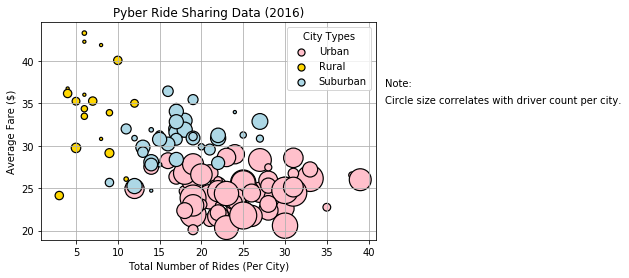

In [4]:
# Obtain the x and y coordinates for each of the three city types
# Basic data
merge_data_group = merge_data.groupby(["city","type"])
ave_fare = merge_data_group["fare"].mean()
total_driver = merge_data_group["driver_count"].mean()
total_ride = merge_data_group["ride_id"].count()

# Place data into dataframe
summary_data = pd.DataFrame({"Average Fare": ave_fare
                              ,"Total Driver": total_driver
                              ,"Total Rides": total_ride})
summary_data = summary_data.reset_index()

summary_urban = summary_data.loc[summary_data["type"] == "Urban",:]
summary_rural = summary_data.loc[summary_data["type"] == "Rural",:]
summary_suburban= summary_data.loc[summary_data["type"] == "Suburban",:]

# Build the scatter plots for each city types
ax1 = summary_urban.plot(kind = "scatter", x = "Total Rides", y = "Average Fare", c = "pink"
                      , s = summary_urban["Total Driver"] * 10
                      , grid = True, edgecolors = "black" , alpha = 1, linewidths = 1.2, label = "Urban")

ax2 = summary_rural.plot(kind = "scatter", x = "Total Rides", y ="Average Fare", c = "gold"
                       , s = summary_rural["Total Driver"] * 10  
                       , alpha = 1, edgecolors = "black", linewidths = 1.2
                       , grid = True, label = "Rural", ax = ax1)

ax3 = summary_suburban.plot(kind = "scatter", x = "Total Rides", y = "Average Fare", c ='lightblue'
                          , s = summary_suburban["Total Driver"] * 10
                          , edgecolors = "black", linewidths = 1.2, alpha = 1  
                          , grid = True, label ='Suburban', ax = ax1)

# Incorporate the other graph properties
ax1.set_xlabel("Total Number of Rides (Per City)")
ax1.set_ylabel("Average Fare ($)")
ax1.set_title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(title = "City Types")

# Incorporate a text label regarding circle size
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Add note
ax1.text(42,37,"Note:")
ax1.text(42,35,"Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Pyber Ride Sharing Data (2016).png")

## Total Fares by City Type

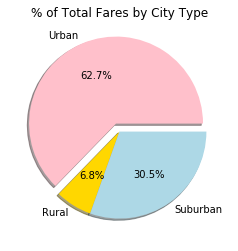

In [46]:
# Calculate Type Percents
merge_data_type = merge_data.groupby(["type"])
fare_by_type = merge_data_type["fare"].sum()
fare_by_type_df = pd.DataFrame(fare_by_type)

# Build Pie Chart
labels = ["Urban","Rural","Suburban"]
sizes = [fare_by_type["Urban"], fare_by_type["Rural"], fare_by_type["Suburban"]]
colors = ["pink", "gold", "lightblue"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 0)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("% of Total Fares by City Type")

## Total Rides by City Type

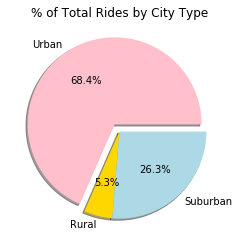

In [48]:
# Calculate Ride Percents
ride_by_type = merge_data_type["ride_id"].count()

# Build Pie Chart
labels = ["Urban","Rural","Suburban"]
sizes = [ride_by_type["Urban"], ride_by_type["Rural"], ride_by_type["Suburban"]]
colors = ["pink", "gold", "lightblue"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 0)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("% of Total Rides by City Type")

## Total Drivers by City Type

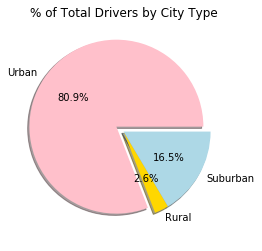

In [52]:
# Calculate Driver Percents
city_data_type = city_data.groupby(["type"])
driver_by_type = city_data_type["driver_count"].sum()

# Build Pie Charts
labels = ["Urban","Rural","Suburban"]
sizes = [driver_by_type["Urban"], driver_by_type["Rural"], driver_by_type["Suburban"]]
colors = ["pink", "gold", "lightblue"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 0)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("% of Total Drivers by City Type")